# sim_study_rippler_varying_U_changes

## preamble

In [2]:
# importing numpy
import numpy as np
from numpy import random

In [3]:
# importing plotting
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

In [4]:
# importing storage for results
import zarr

In [5]:
# importing pandas
import pandas as pd

## simulated data

In [6]:
# loading in functions for simulation
%run '../../function_scripts/model/UC_simulation.py'

In [7]:
# importing the csv - only the important columns
data_real = pd.read_csv("../../Antidote_household.csv", usecols=["hid","pid","date","age","sex","hiv","hivChild","cpt","result","week"])

# converting the pid to integers (and saving lists of sex and age)
pid_unique = []
no_individuals = 0
test_individuals = []
sex = []
age = []
for i in range(1659):
    pid = data_real['pid'][i]
    if pid in pid_unique:
        test_individuals.append(pid_unique.index(pid))
    else:
        pid_unique.append(pid)
        test_individuals.append(no_individuals)
        sex.append(data_real['sex'][i])
        age.append(data_real['age'][i])
        no_individuals += 1
sex = np.array(sex)
age = np.array(age)

# centring age and sex
age = age - np.mean(age)
sex = sex - np.mean(sex)

# calculating N and T
N = no_individuals
T = int(max(data_real['week']))

# making a test result matrix (for the real test results)
test_results_real = np.tile(np.nan,(T+1,N))
for i in range(1659):
    j = test_individuals[i]
    t = int(data_real['week'][i])
    test_results_real[t,j] = data_real['result'][i]

# converting the hid to integers
hid_unique = []
no_houses = 0
test_houses = []
for hid in data_real['hid'] :
    if hid in hid_unique:
        test_houses.append(hid_unique.index(hid))
    else:
        hid_unique.append(hid)
        test_houses.append(no_houses)
        no_houses += 1

# list of which house each individual is in
house_list = []
for i in range(N):
    test_no = test_individuals.index(i)
    house_list.append(test_houses[test_no])

# making a household mixing matrix
h = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if house_list[i]==house_list[j]:
            h[i,j] = 1

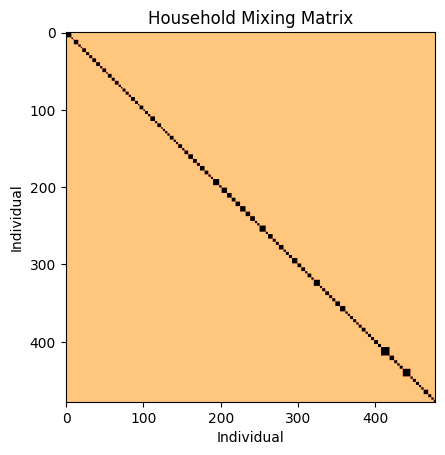

In [8]:
# plotting h
plt.imshow(h,cmap="copper_r")
plt.title("Household Mixing Matrix")
plt.ylabel("Individual")
plt.xlabel("Individual")
plt.show()

In [9]:
# true values of the paramters
theta = np.array([0.1,1.5,0,0])

In [10]:
# true values of other inputs
prop_0 = 0.3
gamma = 0.5
test_rate = 0.3 #will be replaced with other test data, but parameter needed for simulation
sens = 0.95
spec = 0.999

In [11]:
# seasonality modifiers
seasonality_mode = 2
seasonal_period = 52
t_ast = 17

# resulting matrices
seasonal_vector = np.array([1 - np.cos(2*np.pi*(t+t_ast)/seasonal_period) for t in range(T+1)])
seasonal_matrix_G = np.tile(seasonal_vector, (N,1)).T
seasonal_matrix_H = np.tile(1, (T+1,N))

In [12]:
# simulating the data
UC_results = UC_sim(N,h,age,sex,prop_0,theta,gamma,test_rate,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)

In [13]:
# creating a test result matrix
random.seed(256)
test_occurance = test_results_real*0 + 1
pos_prob = 0.9*UC_results['X'] + (1-0.99)*(1-UC_results['X'])
test_outcome = random.binomial(1,pos_prob)
test_results = test_outcome * test_occurance

/tmp/ipykernel_83076/1869204714.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour0, label="%d"%0, linestyle='', marker="s")
/tmp/ipykernel_83076/1869204714.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour1, label="%d"%1, linestyle='', marker="s")


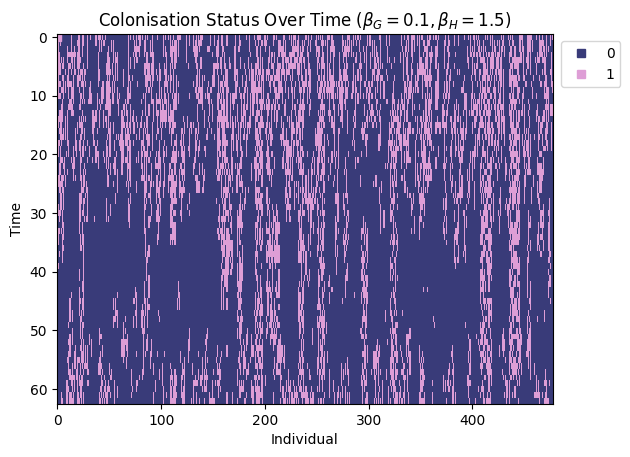

In [14]:
# plotting X
plt.imshow(UC_results['X'],cmap="tab20b",interpolation="nearest",aspect="auto")
#plt.colorbar()
colour0 = '#393b79'
plt.plot(0, 0, "-", color=colour0, label="%d"%0, linestyle='', marker="s")
colour1 = '#de9ed6'
plt.plot(0, 0, "-", color=colour1, label="%d"%1, linestyle='', marker="s")
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1.0), scatterpoints=1)
plt.title(r'Colonisation Status Over Time ($\beta_G=0.1, \beta_H=1.5$)')
plt.ylabel("Time")
plt.xlabel("Individual")
plt.show()

In [15]:
# simulating other datasets
UC_results2 = UC_sim(N,h,age,sex,prop_0,np.array([0.1,3,0,0]),gamma,test_rate,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)
UC_results3 = UC_sim(N,h,age,sex,prop_0,np.array([1.5,0.1,0,0]),gamma,test_rate,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)

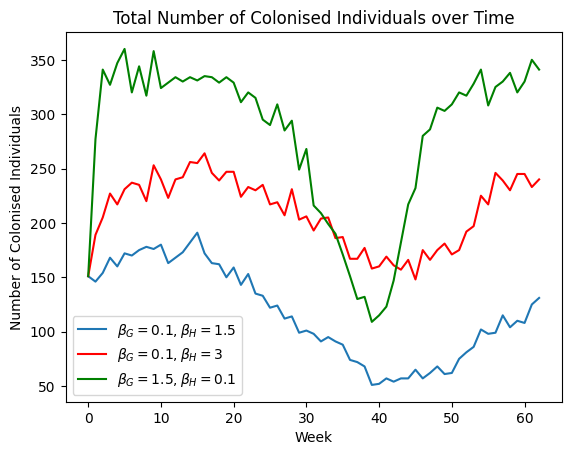

In [16]:
# plotting the number of colonised individuals over time
plt.plot(UC_results['sum_C'],label=r'$\beta_G=0.1, \beta_H=1.5$')
plt.plot(UC_results2['sum_C'],label=r'$\beta_G=0.1, \beta_H=3$',color="red")
plt.plot(UC_results3['sum_C'],label=r'$\beta_G=1.5, \beta_H=0.1$',color="green")
plt.legend()
plt.title("Total Number of Colonised Individuals over Time")
plt.ylabel("Number of Colonised Individuals")
plt.xlabel("Week")
plt.show()

/tmp/ipykernel_83076/3765168887.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour0, label="%d"%0, linestyle='', marker="s")
/tmp/ipykernel_83076/3765168887.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour1, label="%d"%1, linestyle='', marker="s")


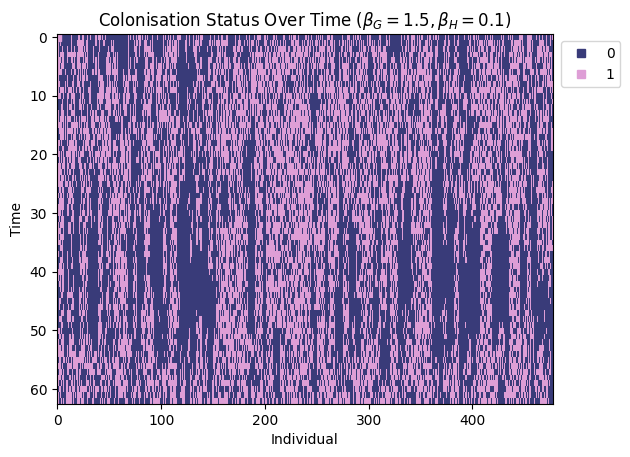

In [17]:
# plotting X
plt.imshow(UC_results2['X'],cmap="tab20b",interpolation="nearest",aspect="auto")
#plt.colorbar()
colour0 = '#393b79'
plt.plot(0, 0, "-", color=colour0, label="%d"%0, linestyle='', marker="s")
colour1 = '#de9ed6'
plt.plot(0, 0, "-", color=colour1, label="%d"%1, linestyle='', marker="s")
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1.0), scatterpoints=1)
plt.title(r'Colonisation Status Over Time ($\beta_G=1.5, \beta_H=0.1$)')
plt.ylabel("Time")
plt.xlabel("Individual")
plt.show()

/tmp/ipykernel_83076/2616147949.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour0, label="0", linestyle='', marker="s")
/tmp/ipykernel_83076/2616147949.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour1, label="1", linestyle='', marker="s")
/tmp/ipykernel_83076/2616147949.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour2, label="NA", linestyle='', marker="s")


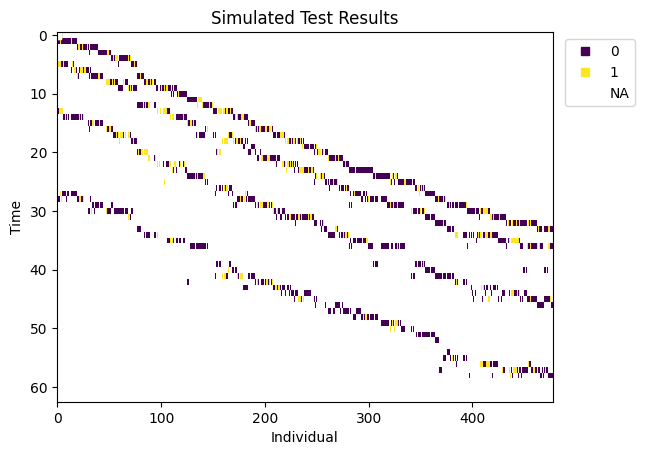

In [18]:
# looking at the test result matrix
plt.imshow(test_results,cmap="viridis",interpolation="nearest",aspect="auto")
colour0 = '#440154'
plt.plot(0, 0, "-", color=colour0, label="0", linestyle='', marker="s")
colour1 = '#fae622'
plt.plot(0, 0, "-", color=colour1, label="1", linestyle='', marker="s")
colour2 = '#ffffff'
plt.plot(0, 0, "-", color=colour2, label="NA", linestyle='', marker="s")
plt.legend(loc="upper right", bbox_to_anchor=(1.18, 1.0), scatterpoints=1)
plt.title(r'Simulated Test Results')
plt.ylabel("Time")
plt.xlabel("Individual")
plt.show()

In [19]:
# function to work out the number of TP/FP/TN/FNs
def test_acc(X:np.array,test_results:np.array) :
    
    # list of inputs:
    # X - matrix of all individuals colonisation status over time
    # test_results - matrix of all individuals colonisation status over time

    # creating a matrix comparing the results with the current latent variable values (0 for TPs or TNs, 1 for FPs, -1 for FNs, and nan for no tests)
    test_diff_matrix = test_results - X

    # calculating the number of TP/FP/TN/FNs from this matrix
    TP = np.sum((test_diff_matrix==0)*X)
    FN = np.sum(test_diff_matrix==-1)
    FP = np.sum(test_diff_matrix==1)
    TN = np.sum((test_diff_matrix==0)*(1-X))

    # returning outputs
    output = {'TP':TP, 'FN':FN, 'FP':FP, 'TN':TN}
    return output

In [20]:
# the number of TP/FP/TN/FNs
test_acc(UC_results['X'],test_results)

{'TP': 363, 'FN': 38, 'FP': 16, 'TN': 1156}

## inference information

In [21]:
# hyperparameters of priors
mu = np.array([0.001,0.001,0.001,0.001])
prior_X_0 = 0.3

In [22]:
# starting values
theta_start = np.array([0.5,0.5,0,0])
X_start = UC_sim(N,h,age,sex,prop_0,theta,gamma,test_rate,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)['X']
covariance_start = 0.8*0.000001*np.identity(4)
scaling = 0.8

In [23]:
# MCMC iterations
K = 10000
K_latent = 100

## acceptance rates

In [24]:
# importing the saved acceptance rates
MCMC_noncentred_acc_01 = zarr.open('./MCMC_output/U_01/acc.zarr', mode='r')
MCMC_noncentred_acc_02 = zarr.open('./MCMC_output/U_02/acc.zarr', mode='r')
MCMC_noncentred_acc_03 = zarr.open('./MCMC_output/U_03/acc.zarr', mode='r')
MCMC_noncentred_acc_04 = zarr.open('./MCMC_output/U_04/acc.zarr', mode='r')
MCMC_noncentred_acc_05 = zarr.open('./MCMC_output/U_05/acc.zarr', mode='r')
MCMC_noncentred_acc_06 = zarr.open('./MCMC_output/U_06/acc.zarr', mode='r')
MCMC_noncentred_acc_07 = zarr.open('./MCMC_output/U_07/acc.zarr', mode='r')
MCMC_noncentred_acc_08 = zarr.open('./MCMC_output/U_08/acc.zarr', mode='r')
MCMC_noncentred_acc_09 = zarr.open('./MCMC_output/U_09/acc.zarr', mode='r')
MCMC_noncentred_acc_10 = zarr.open('./MCMC_output/U_10/acc.zarr', mode='r')

# printing the acceptance rates
print(MCMC_noncentred_acc_01[2],MCMC_noncentred_acc_02[2],MCMC_noncentred_acc_03[2],MCMC_noncentred_acc_04[2],MCMC_noncentred_acc_05[2],MCMC_noncentred_acc_06[2],MCMC_noncentred_acc_07[2],MCMC_noncentred_acc_08[2],MCMC_noncentred_acc_09[2],MCMC_noncentred_acc_10[2])

# removing the acceptance rates from memory
del(MCMC_noncentred_acc_01)
del(MCMC_noncentred_acc_02)
del(MCMC_noncentred_acc_03)
del(MCMC_noncentred_acc_04)
del(MCMC_noncentred_acc_05)
del(MCMC_noncentred_acc_06)
del(MCMC_noncentred_acc_07)
del(MCMC_noncentred_acc_08)
del(MCMC_noncentred_acc_09)
del(MCMC_noncentred_acc_10)

0.536439 0.292284 0.158884 0.087898 0.052008 0.029174 0.015292 0.007381 0.004815 0.002907


## latent variables

In [45]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/U_01/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(K-1):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/K
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

530.4442


In [46]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/U_02/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(K-1):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/K
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

562.4433


In [47]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/U_03/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(K-1):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/K
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

465.2541


In [48]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/U_04/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(K-1):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/K
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

354.0352


In [49]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/U_05/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(K-1):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/K
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

263.516


In [50]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/U_06/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(K-1):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/K
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

184.1602


In [51]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/U_07/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(K-1):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/K
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

109.4762


In [52]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/U_08/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(K-1):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/K
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

62.0426


In [53]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/U_09/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(K-1):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/K
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

46.9257


In [54]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/U_10/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(K-1):
    #print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
MSJD = MSJD/K
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

32.6075


## plots

In [56]:
# collecting the acceptance rates and MSJDs
accept_rippler = np.array([0.536439, 0.292284, 0.158884, 0.087898, 0.052008, 0.029174, 0.015292, 0.007381, 0.004815, 0.002907])
MSJD_rippler = np.array([530.4442, 562.4433, 465.2541, 354.0352, 263.516, 184.1602, 109.4762, 62.0426, 46.9257, 32.6075])
K_U = np.arange(1,11)

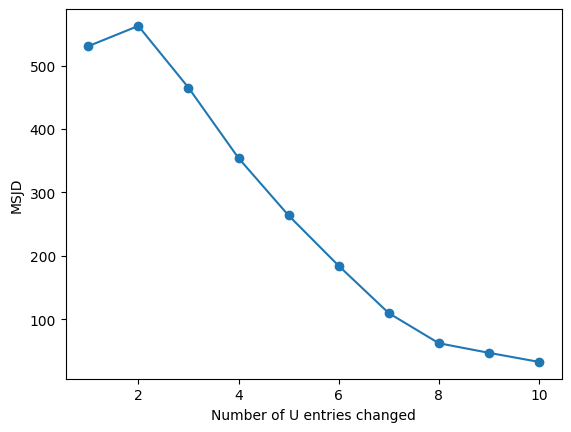

In [61]:
# plotting
plt.plot(K_U, MSJD_rippler)
plt.scatter(K_U, MSJD_rippler)
plt.ylabel("MSJD")
plt.xlabel("Number of U entries changed")
#plt.savefig("plots/U_vs_MSJD.pdf")
plt.show()

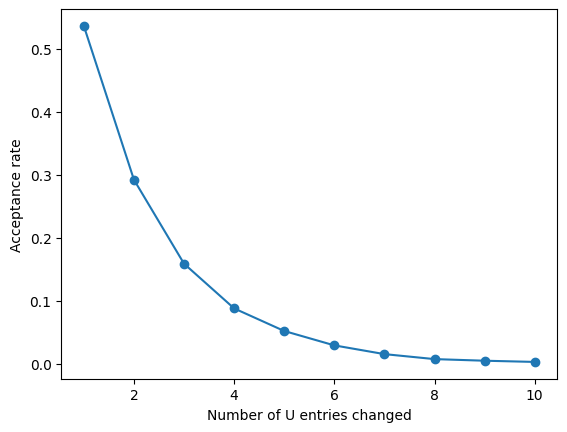

In [62]:
# plotting
plt.plot(K_U, accept_rippler)
plt.scatter(K_U, accept_rippler)
plt.ylabel("Acceptance rate")
plt.xlabel("Number of U entries changed")
#plt.savefig("plots/U_vs_acceptance.pdf")
plt.show()

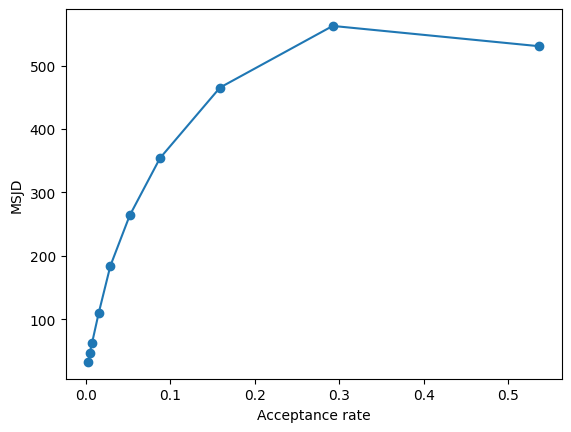

In [59]:
# plotting
plt.plot(accept_rippler, MSJD_rippler)
plt.scatter(accept_rippler, MSJD_rippler)
plt.ylabel("MSJD")
plt.xlabel("Acceptance rate")
plt.show()

## end